In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [5]:
# Your data
data = {
    'Sample': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'Treatment': ['None', 'Solvent', 'Solvent', 'UV', 'UV', 'UV', 'UV', 'Solvent', 'Solvent'],
    'Solvent': ['None', 'Toluene', 'Air', 'Water', 'Toluene', 'Air', 'Acetone', 'Water', 'Acetone'],
    'Carbon': [60.87, 64.74, 64.12, 56.72, 61.11, 56.24, 66.92, 59.83, 65.99],
    'Carbon_Error': [0.19, 1.95, 0.47, 0.13, 0.07, 0.16, 0.46, 0.44, 0.24],
    'Oxygen': [33.77, 29.10, 28.75, 35.69, 33.20, 37.59, 27.17, 31.77, 27.61],
    'Oxygen_Error': [0.25, 2.02, 0.29, 0.22, 0.04, 0.18, 0.50, 0.53, 0.21],
    'Aluminum': [5.35, 6.16, 7.14, 7.60, 5.69, 6.17, 5.91, 8.40, 6.40],
    'Aluminum_Error': [0.18, 0.22, 0.18, 0.32, 0.06, 0.02, 0.04, 0.16, 0.10]
}

df = pd.DataFrame(data)

# Filter out the 'None' solvent
df_plot = df[df['Solvent'] != 'None']


AttributeError: Rectangle.set() got an unexpected keyword argument 'errorbar'

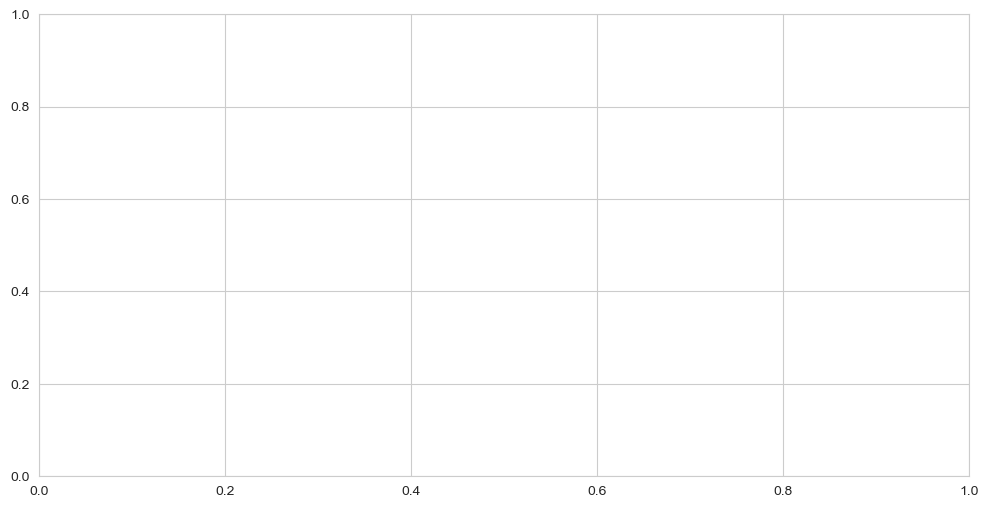

In [6]:
# Set up the plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create a bar plot
ax = sns.barplot(
    x='Solvent',
    y='Carbon',
    hue='Treatment',
    data=df_plot,
    errorbar='sd',  # For Seaborn 0.13.2
    capsize=0.1
)

plt.title('Carbon Content by Solvent and Treatment')
plt.ylabel('Carbon (%)')
plt.xlabel('Solvent')
plt.legend(title='Treatment')


In [7]:
# Define the pairs you want to compare
comparisons = [
    (('Toluene', 'Solvent'), ('Toluene', 'UV')),
    (('Water', 'Solvent'), ('Water', 'UV')),
    (('Acetone', 'Solvent'), ('Acetone', 'UV')),
    (('Air', 'Solvent'), ('Air', 'UV'))
]

# Function to add annotations
def add_stat_annotation(ax, x1, x2, y, text):
    ax.plot([x1, x1, x2, x2], [y, y+1, y+1, y], lw=1.5, c='k')
    ax.text((x1 + x2) / 2, y + 1.1, text, ha='center', va='bottom', color='k')

# Get unique solvents and treatments
solvents = df_plot['Solvent'].unique()
treatments = df_plot['Treatment'].unique()

# Width of each bar group
group_width = 0.8
bar_width = group_width / len(treatments)

# Loop over comparisons
for comp in comparisons:
    solvent = comp[0][0]
    treatment1 = comp[0][1]
    treatment2 = comp[1][1]

    # Get data for the two groups
    group1 = df_plot[(df_plot['Solvent'] == solvent) & (df_plot['Treatment'] == treatment1)]['Carbon']
    group2 = df_plot[(df_plot['Solvent'] == solvent) & (df_plot['Treatment'] == treatment2)]['Carbon']

    # Perform t-test
    t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)

    # Determine significance level
    if p_value < 0.001:
        significance = '***'
    elif p_value < 0.01:
        significance = '**'
    elif p_value < 0.05:
        significance = '*'
    else:
        significance = 'ns'

    # Get x positions for the bars
    x = solvents.tolist().index(solvent)
    x1 = x - group_width/2 + bar_width/2
    x2 = x + group_width/2 - bar_width/2

    # Adjust x positions based on treatments
    if treatment1 == 'Solvent':
        x1_pos = x1
    else:
        x1_pos = x2
    if treatment2 == 'Solvent':
        x2_pos = x1
    else:
        x2_pos = x2

    # Get y position (maximum height of the bars in this solvent group)
    y_max = max(group1.max(), group2.max())
    y, h = y_max + 1, 0.5  # Adjust as needed

    # Add the annotation
    add_stat_annotation(ax, x1_pos, x2_pos, y, significance)

# Show the plot
plt.show()


D:\Users\themi\AppData\Local\Temp\ipykernel_49176\1781799766.py:33: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
D:\Users\themi\miniconda3\envs\MetalconeStability\lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
D:\Users\themi\miniconda3\envs\MetalconeStability\lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


NameError: name 'ax' is not defined

D:\Users\themi\AppData\Local\Temp\ipykernel_12088\2996955396.py:84: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
D:\Users\themi\miniconda3\envs\MetalconeStability\lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
D:\Users\themi\miniconda3\envs\MetalconeStability\lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


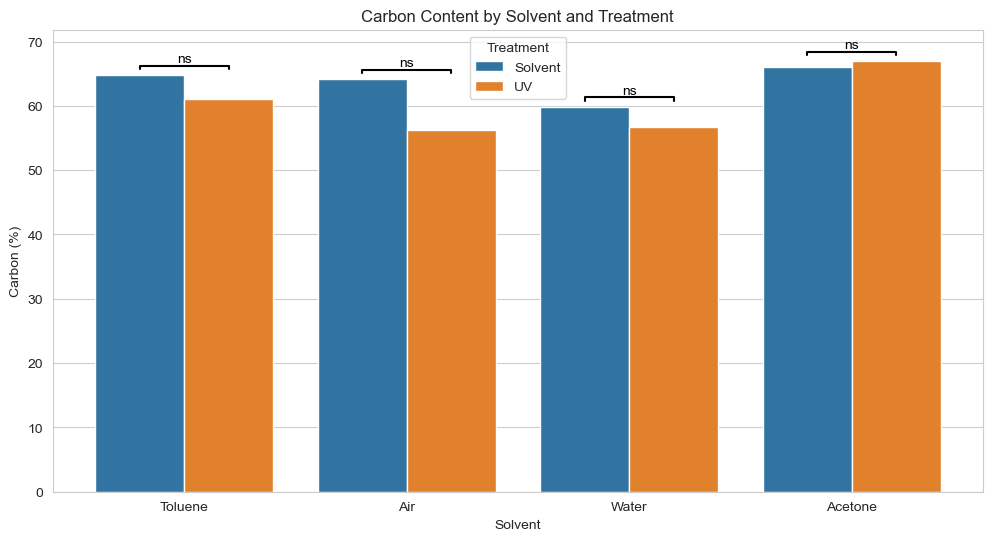

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Your data preparation
data = {
    'Sample': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'Treatment': ['None', 'Solvent', 'Solvent', 'UV', 'UV', 'UV', 'UV', 'Solvent', 'Solvent'],
    'Solvent': ['None', 'Toluene', 'Air', 'Water', 'Toluene', 'Air', 'Acetone', 'Water', 'Acetone'],
    'Carbon': [60.87, 64.74, 64.12, 56.72, 61.11, 56.24, 66.92, 59.83, 65.99],
    'Carbon_Error': [0.19, 1.95, 0.47, 0.13, 0.07, 0.16, 0.46, 0.44, 0.24],
    'Oxygen': [33.77, 29.10, 28.75, 35.69, 33.20, 37.59, 27.17, 31.77, 27.61],
    'Oxygen_Error': [0.25, 2.02, 0.29, 0.22, 0.04, 0.18, 0.50, 0.53, 0.21],
    'Aluminum': [5.35, 6.16, 7.14, 7.60, 5.69, 6.17, 5.91, 8.40, 6.40],
    'Aluminum_Error': [0.18, 0.22, 0.18, 0.32, 0.06, 0.02, 0.04, 0.16, 0.10]
}

df = pd.DataFrame(data)

# Filter out the 'None' solvent
df_plot = df[df['Solvent'] != 'None']

# Set up the plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

ax = sns.barplot(
    x='Solvent',
    y='Carbon',
    hue='Treatment',
    data=df_plot,
    ci=None,  # No built-in error bars
    capsize=0.1
    )


plt.title('Carbon Content by Solvent and Treatment')
plt.ylabel('Carbon (%)')
plt.xlabel('Solvent')
plt.legend(title='Treatment')

# Since 'statannotations' may not be compatible, we'll manually add annotations

# Define the pairs you want to compare
comparisons = [
    (('Toluene', 'Solvent'), ('Toluene', 'UV')),
    (('Water', 'Solvent'), ('Water', 'UV')),
    (('Acetone', 'Solvent'), ('Acetone', 'UV')),
    (('Air', 'Solvent'), ('Air', 'UV'))
]

# Function to add annotations
def add_stat_annotation(ax, x1, x2, y, text):
    ax.plot([x1, x1, x2, x2], [y, y+0.5, y+0.5, y], lw=1.5, c='k')
    ax.text((x1 + x2) / 2, y + 0.5, text, ha='center', va='bottom', color='k')

# Get the positions of the bars
grouped = df_plot.groupby(['Solvent', 'Treatment']).mean().reset_index()
solvents = df_plot['Solvent'].unique()
treatments = df_plot['Treatment'].unique()

group_width = 0.8
bar_width = group_width / len(treatments)

# Map treatments to offsets
treatment_offsets = {
    treatment: (-group_width/2 + bar_width/2 + i*bar_width)
    for i, treatment in enumerate(treatments)
}

# Loop over comparisons
for comp in comparisons:
    solvent = comp[0][0]
    treatment1 = comp[0][1]
    treatment2 = comp[1][1]

    # Get data for the two groups
    group1 = df_plot[(df_plot['Solvent'] == solvent) & (df_plot['Treatment'] == treatment1)]['Carbon']
    group2 = df_plot[(df_plot['Solvent'] == solvent) & (df_plot['Treatment'] == treatment2)]['Carbon']

    # Perform t-test
    t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)

    # Determine significance level
    if p_value < 0.001:
        significance = '***'
    elif p_value < 0.01:
        significance = '**'
    elif p_value < 0.05:
        significance = '*'
    else:
        significance = 'ns'

    # Get x positions for the bars
    x = solvents.tolist().index(solvent)
    x1 = x + treatment_offsets[treatment1]
    x2 = x + treatment_offsets[treatment2]

    # Get y position (maximum height of the bars in this solvent group)
    y_max = max(group1.max(), group2.max())
    y = y_max + 1  # Adjust as needed

    # Add the annotation
    add_stat_annotation(ax, x1, x2, y, significance)

plt.show()


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Verify library versions
print("Seaborn version:", sns.__version__)
print("Matplotlib version:", plt.__version__)


Seaborn version: 0.11.2


AttributeError: module 'matplotlib.pyplot' has no attribute '__version__'

In [11]:
# Your data
data = {
    'Sample': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'Treatment': ['None', 'Solvent', 'Solvent', 'UV', 'UV', 'UV', 'UV', 'Solvent', 'Solvent'],
    'Solvent': ['None', 'Toluene', 'Air', 'Water', 'Toluene', 'Air', 'Acetone', 'Water', 'Acetone'],
    'Carbon': [60.87, 64.74, 64.12, 56.72, 61.11, 56.24, 66.92, 59.83, 65.99],
    'Carbon_Error': [0.19, 1.95, 0.47, 0.13, 0.07, 0.16, 0.46, 0.44, 0.24],
    'Oxygen': [33.77, 29.10, 28.75, 35.69, 33.20, 37.59, 27.17, 31.77, 27.61],
    'Oxygen_Error': [0.25, 2.02, 0.29, 0.22, 0.04, 0.18, 0.50, 0.53, 0.21],
    'Aluminum': [5.35, 6.16, 7.14, 7.60, 5.69, 6.17, 5.91, 8.40, 6.40],
    'Aluminum_Error': [0.18, 0.22, 0.18, 0.32, 0.06, 0.02, 0.04, 0.16, 0.10]
}

df = pd.DataFrame(data)

# Filter out the 'None' solvent for plotting
df_plot = df[df['Solvent'] != 'None'].reset_index(drop=True)


In [12]:
# Function to perform t-tests and add annotations
def add_stat_annotations(ax, df, y_col, y_err_col):
    # Define the pairs you want to compare
    comparisons = [
        (('Toluene', 'Solvent'), ('Toluene', 'UV')),
        (('Water', 'Solvent'), ('Water', 'UV')),
        (('Acetone', 'Solvent'), ('Acetone', 'UV')),
        (('Air', 'Solvent'), ('Air', 'UV'))
    ]
    
    # Get unique solvents and treatments
    solvents = df['Solvent'].unique()
    treatments = df['Treatment'].unique()
    
    # Width of each bar group
    group_width = 0.8
    bar_width = group_width / len(treatments)
    
    # Map treatments to offsets
    treatment_offsets = {
        treatment: (-group_width/2 + bar_width/2 + i*bar_width)
        for i, treatment in enumerate(treatments)
    }
    
    # Function to add annotations
    def add_annotation(ax, x1, x2, y, h, text):
        ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c='k')
        ax.text((x1 + x2) / 2, y + h + 0.1, text, ha='center', va='bottom', color='k')
    
    # Loop over comparisons
    for comp in comparisons:
        solvent = comp[0][0]
        treatment1 = comp[0][1]
        treatment2 = comp[1][1]
    
        # Get data for the two groups
        group1 = df[(df['Solvent'] == solvent) & (df['Treatment'] == treatment1)][y_col]
        group2 = df[(df['Solvent'] == solvent) & (df['Treatment'] == treatment2)][y_col]
    
        # Perform t-test if there are at least two samples in each group
        if len(group1) > 1 and len(group2) > 1:
            t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
        else:
            # Use a placeholder p-value or skip the test
            p_value = 1.0  # Not enough data to perform test
    
        # Determine significance level
        if p_value < 0.001:
            significance = '***'
        elif p_value < 0.01:
            significance = '**'
        elif p_value < 0.05:
            significance = '*'
        else:
            significance = 'ns'
    
        # Get x positions for the bars
        x = solvents.tolist().index(solvent)
        x1 = x + treatment_offsets[treatment1]
        x2 = x + treatment_offsets[treatment2]
    
        # Get y position (maximum height of the bars in this solvent group)
        y_max = max(group1.max(), group2.max())
        y_err1 = df[(df['Solvent'] == solvent) & (df['Treatment'] == treatment1)][y_err_col].values
        y_err2 = df[(df['Solvent'] == solvent) & (df['Treatment'] == treatment2)][y_err_col].values
        y_err = max(y_err1.max(), y_err2.max()) if len(y_err1) > 0 and len(y_err2) > 0 else 0
        y = y_max + y_err + 0.5  # Adjust as needed
        h = 0.3  # Height of the annotation line
    
        # Add the annotation
        add_annotation(ax, x1, x2, y, h, significance)


In [9]:
# Set up the plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create the bar plot
ax = sns.barplot(
    x='Solvent',
    y='Carbon',
    hue='Treatment',
    data=df_plot,
    errorbar='sd',  # Use 'sd' for standard deviation
    capsize=0.1
)

plt.title('Carbon Content by Solvent and Treatment')
plt.ylabel('Carbon (%)')
plt.xlabel('Solvent')
plt.legend(title='Treatment')

# Add statistical annotations
add_stat_annotations(ax, df_plot, 'Carbon', 'Carbon_Error')

plt.show()


TypeError: 'module' object is not callable

AttributeError: Rectangle.set() got an unexpected keyword argument 'errorbar'

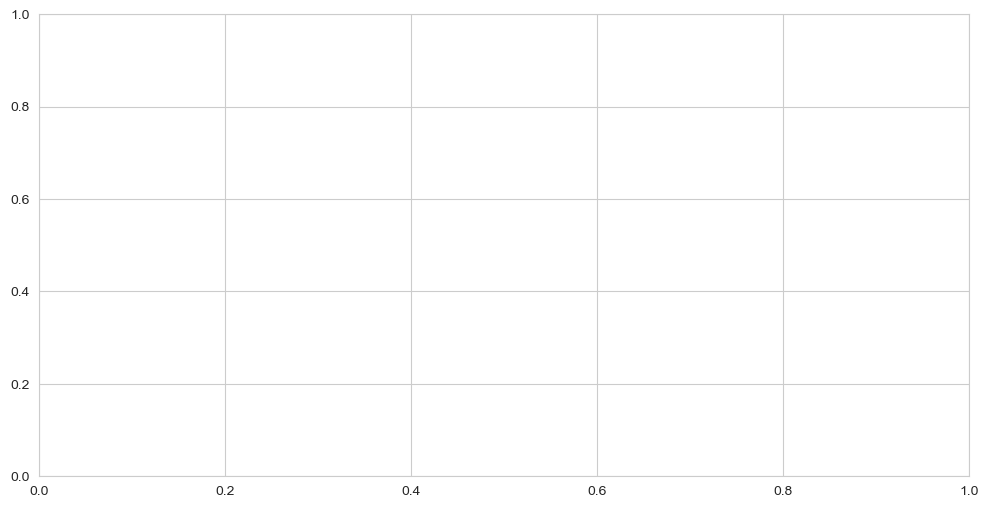

In [13]:
# Set up the plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create the bar plot
ax = sns.barplot(
    x='Solvent',
    y='Oxygen',
    hue='Treatment',
    data=df_plot,
    errorbar='sd',
    capsize=0.1
)

plt.title('Oxygen Content by Solvent and Treatment')
plt.ylabel('Oxygen (%)')
plt.xlabel('Solvent')
plt.legend(title='Treatment')

# Add statistical annotations
add_stat_annotations(ax, df_plot, 'Oxygen', 'Oxygen_Error')

plt.show()
